In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


import sys, os, glob
sys.path.append("../")
import setigen as stg

In [2]:
t_profile = stg.periodic_gaussian_t_profile(period=1, 
                                            phase=0, 
                                            sigma=4, 
                                            pulse_dir='rand', 
                                            width=1, 
                                            pnum=5, 
                                            amplitude=1, 
                                            level=0)

In [3]:
tsamp = 1.4
tchans = 1024
ts = np.arange(0, tchans*tsamp, tsamp)

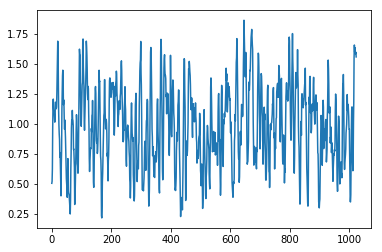

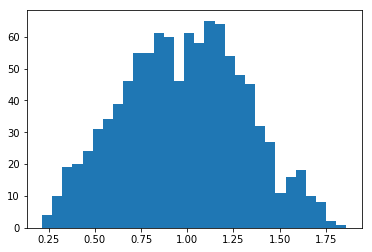

In [4]:
tsamp = 1.4
tchans = 1024
ts = np.arange(0, tchans*tsamp, tsamp)

t_profile = stg.periodic_gaussian_t_profile(period=2, 
                                            phase=0, 
                                            sigma=2, 
                                            pulse_dir='rand', 
                                            width=3, 
                                            pnum=5, 
                                            amplitude=2, 
                                            level=10)

profile = t_profile(ts) / np.mean(t_profile(ts))

plt.plot(profile)
plt.show()

plt.hist(profile, bins=30)
plt.show()

In [5]:
levels = np.linspace(0, 3, 100)

In [6]:
np.exp(-levels)

array([1.        , 0.9701515 , 0.94119394, 0.91310072, 0.88584603,
       0.85940486, 0.83375292, 0.80886665, 0.78472319, 0.76130039,
       0.73857671, 0.71653131, 0.69514393, 0.67439493, 0.65426525,
       0.63473642, 0.61579049, 0.59741007, 0.57957828, 0.56227874,
       0.54549556, 0.52921334, 0.51341712, 0.49809239, 0.48322508,
       0.46880154, 0.45480852, 0.44123317, 0.42806302, 0.41528598,
       0.40289032, 0.39086465, 0.37919793, 0.36787944, 0.35689879,
       0.3462459 , 0.33591098, 0.32588454, 0.31615738, 0.30672056,
       0.29756541, 0.28868353, 0.28006676, 0.27170719, 0.26359714,
       0.25572916, 0.24809603, 0.24069074, 0.23350648, 0.22653666,
       0.21977488, 0.21321493, 0.20685079, 0.2006766 , 0.19468671,
       0.1888756 , 0.18323795, 0.17776857, 0.17246245, 0.1673147 ,
       0.16232061, 0.15747559, 0.15277518, 0.14821507, 0.14379107,
       0.13949912, 0.13533528, 0.13129573, 0.12737675, 0.12357474,
       0.11988622, 0.1163078 , 0.11283619, 0.1094682 , 0.10620

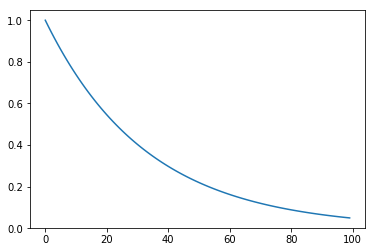

In [7]:
plt.plot(np.exp(-levels))

In [8]:
total = np.sum(np.exp(-levels))

In [9]:
total

31.884319768926634

[[ 1.05163648 -0.79589658 -0.91205812  0.6151589  -0.85612415  0.66308161
  -1.4116445  -1.03705753  0.52627198 -0.61691955]
 [ 0.83791552  1.2002002  -1.29021211 -0.30715451  1.09604747 -0.19952107
  -0.27116479  1.06359303 -0.25080073 -0.34987035]]


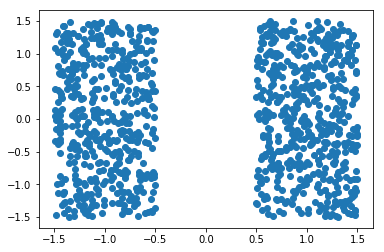

In [10]:
class Distribution(object):
    """
    draws samples from a one dimensional probability distribution,
    by means of inversion of a discrete inverstion of a cumulative density function

    the pdf can be sorted first to prevent numerical error in the cumulative sum
    this is set as default; for big density functions with high contrast,
    it is absolutely necessary, and for small density functions,
    the overhead is minimal

    a call to this distibution object returns indices into density array
    """
    def __init__(self, pdf, sort = True, interpolation = True, transform = lambda x: x):
        self.shape          = pdf.shape
        self.pdf            = pdf.ravel()
        self.sort           = sort
        self.interpolation  = interpolation
        self.transform      = transform

        #a pdf can not be negative
        assert(np.all(pdf>=0))

        #sort the pdf by magnitude
        if self.sort:
            self.sortindex = np.argsort(self.pdf, axis=None)
            self.pdf = self.pdf[self.sortindex]
        #construct the cumulative distribution function
        self.cdf = np.cumsum(self.pdf)
    @property
    def ndim(self):
        return len(self.shape)
    @property
    def sum(self):
        """cached sum of all pdf values; the pdf need not sum to one, and is imlpicitly normalized"""
        return self.cdf[-1]
    def __call__(self, N):
        """draw """
        #pick numbers which are uniformly random over the cumulative distribution function
        choice = np.random.uniform(high = self.sum, size = N)
        #find the indices corresponding to this point on the CDF
        index = np.searchsorted(self.cdf, choice)
        #if necessary, map the indices back to their original ordering
        if self.sort:
            index = self.sortindex[index]
        #map back to multi-dimensional indexing
        index = np.unravel_index(index, self.shape)
        index = np.vstack(index)
        #is this a discrete or piecewise continuous distribution?
        if self.interpolation:
            index = index + np.random.uniform(size=index.shape)
        return self.transform(index)


if __name__=='__main__':
    shape = 3,3
    pdf = np.ones(shape)
    pdf[1]=0
    dist = Distribution(pdf, transform=lambda i:i-1.5)
    print(dist(10))
    import matplotlib.pyplot as pp
    pp.scatter(*dist(1000))
    pp.show()

[1.45635939e-03 2.25725736e-05]


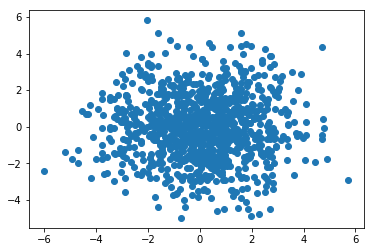

In [11]:
x = np.linspace(-100, 100, 512)
p = np.exp(-x**2)
pdf = p[:,None]*p[None,:]     #2d gaussian
dist = Distribution(pdf, transform=lambda i:i-256)
print(dist(1000000).mean(axis=1) )   #should be in the 1/sqrt(1e6) range
import matplotlib.pyplot as pp
pp.scatter(*dist(1000))
pp.show()

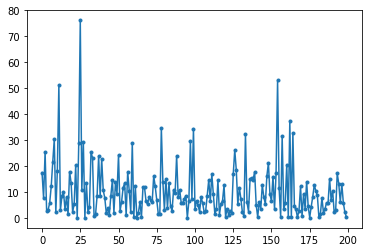

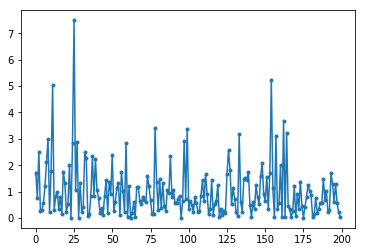

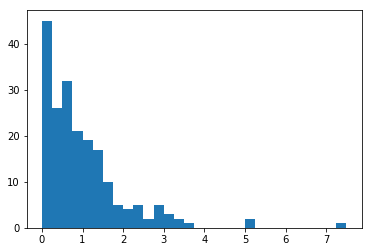

In [12]:
x = np.linspace(0, 100, 1024)
pdf = np.exp(-x)
dist = Distribution(pdf)
points = dist(200)[0]
plt.plot(points, '.-')
plt.show()

points /= np.mean(points)
plt.plot(points, '.-')
plt.show()

plt.hist(points, bins=30)
plt.show()

In [13]:
dist(1000).shape

(1, 1000)

In [14]:
points.shape

(200,)

In [15]:
points = np.sort(points)

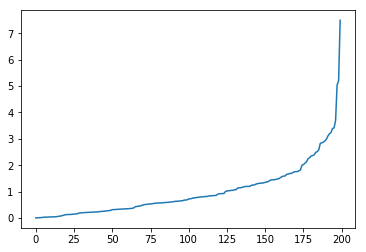

In [16]:
plt.plot(points)

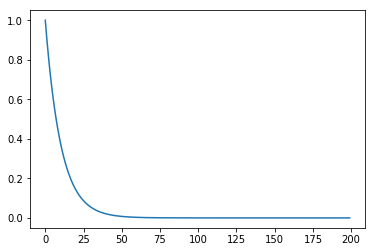

In [17]:
plt.plot(pdf[:200])

In [18]:
rho = np.array([0.9, 0.6])

p = len(rho)


r = np.array([0.9, 0.65])
assert len(r) == len(rho)

In [19]:
def psi(r):
    p = len(r)
    covariance = np.ones((p, p))
    for i in range(0, p - 1):
        for j in range(0, p - i - 1):
            covariance[i + j + 1, j] = covariance[j, i + j + 1] = rho[i]
    return covariance

covariance = psi(r)
print(covariance)

[[1.  0.9]
 [0.9 1. ]]


In [20]:
Z = np.random.multivariate_normal(np.zeros(p), covariance)
Z.shape

(2,)

In [21]:
Z = list(Z)
Z

[1.4386616061253321, 0.9674459039770469]

In [22]:
t = p

In [23]:
r.shape, covariance.shape

((2,), (2, 2))

In [24]:
alpha = np.dot(r, np.linalg.inv(covariance))
alpha

array([ 1.65789474, -0.84210526])

In [25]:
variance = 1 - np.dot(alpha, r)
variance

0.05526315789473657

In [26]:
epsilon = np.random.normal(0, np.sqrt(variance))
epsilon

-0.3075767095192144

In [27]:
def get_next(Z):
    '''Appends next element to Z list'''
    epsilon = np.random.normal(0, np.sqrt(variance))
    Z_t = np.dot(alpha, Z[:-p-1:-1]) + epsilon
    Z.append(Z_t)
get_next(Z)
Z

[1.4386616061253321, 0.9674459039770469, 0.45172551097839747]

In [28]:
from scipy.stats import norm
norm.cdf(0.95)

0.8289438736915182

In [29]:
norm.cdf(Z)

array([0.92487679, 0.83333941, 0.67426663])

In [30]:
def inv_exp_cdf(x, l=1):
    return -np.log(1. - x) / l

In [31]:
Y = inv_exp_cdf(norm.cdf(Z))
Y

array([2.5886257 , 1.79179595, 1.12167612])

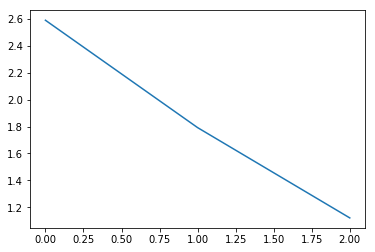

In [32]:
plt.plot(Y)

(200,)
2
[0.9 0.6] [0.9  0.65]
[1.         0.89295444 0.62342479 0.27654688]
[1.         0.88525215 0.61251625 0.28678209]


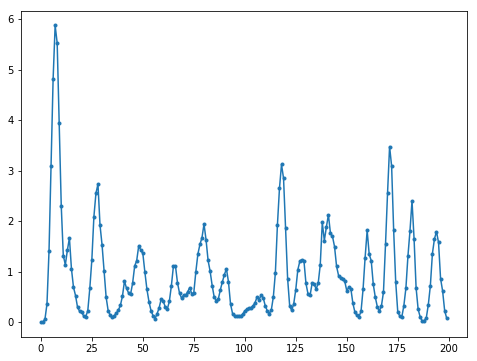

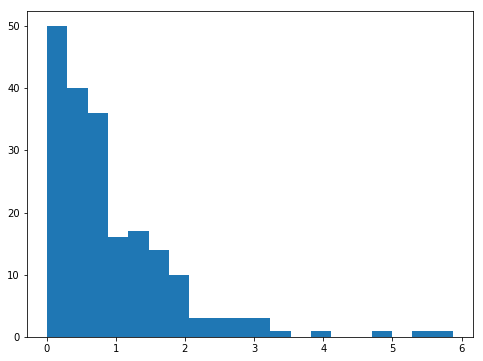

In [26]:
from scipy.stats import norm

rho = np.array([0.9, 0.6])
p = len(rho)

T = 200

r = np.array([0.9, 0.65])
assert len(r) == len(rho)

def psi(r):
    p = len(r)
    covariance = np.ones((p, p))
    for i in range(0, p - 1):
        for j in range(0, p - i - 1):
            covariance[i + j + 1, j] = covariance[j, i + j + 1] = rho[i]
    return covariance

covariance = psi(r)
# print(covariance)

Z = list(np.random.multivariate_normal(np.zeros(p), covariance))
t = p

alpha = np.dot(r, np.linalg.inv(covariance))
variance = 1 - np.dot(alpha, r)
epsilon = np.random.normal(0, np.sqrt(variance))

def get_next(Z):
    '''Appends next element to Z list'''
    epsilon = np.random.normal(0, np.sqrt(variance))
    Z_t = np.dot(alpha, Z[:-p-1:-1]) + epsilon
    Z.append(Z_t)

while t < T:
    get_next(Z)
    t += 1
    
def inv_exp_cdf(x, l=1):
    return -np.log(1. - x) / l

Y = inv_exp_cdf(norm.cdf(Z))
print(Y.shape)

def acm(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

def acf(x, length=20):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]  \
        for i in range(1, length)])

# print(autocorr(Y, 1))
print(p)
print(rho, r)
print(acf(Z, p + 2))
print(acf(Y, p + 2))


plt.figure(figsize=(8,6))
plt.plot(Y, '.-')
plt.show()

plt.figure(figsize=(8,6))
plt.hist(Y, bins=20)
plt.show()

In [34]:
alpha

array([ 1.65789474, -0.84210526])

In [36]:
np.abs(np.roots([1]+list(-alpha)))

array([0.91766294, 0.91766294])

In [39]:
np.all(np.abs(np.roots([1]+list(-alpha))) <= 1.)

True

For parameters relevant to actual observations:

1.2739827004320285


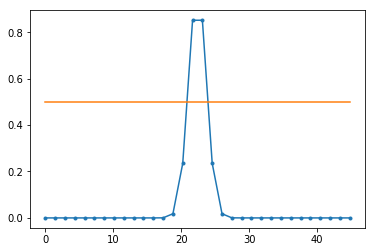

In [132]:
dt = 1.4
t_scint = 3
tchans = 32

sigma = t_scint / (2*np.sqrt(2*np.log(2)))
print(sigma)

x = np.linspace(0, tchans*dt, tchans)
def gaussian(x, m, s):
    return np.exp(-0.5*((x - m) / s)**2)

y = gaussian(x, tchans*dt/2, sigma)

plt.plot(x, y, '.-')
plt.plot(x, x*0+0.5)
plt.show()


In [150]:
rho = acf(y, length=5)[1:]
rho

array([ 0.69555399,  0.19190166, -0.05881583, -0.11921335])

In [151]:
gaussian(dt, 0, sigma), gaussian(2*dt, 0, sigma)

(0.5467256203072339, 0.08934653283089655)

[[ 1.          0.69555399  0.19190166 -0.05881583]
 [ 0.69555399  1.          0.69555399  0.19190166]
 [ 0.19190166  0.69555399  1.          0.69555399]
 [-0.05881583  0.19190166  0.69555399  1.        ]]
[ 1.41793913 -1.29368306  0.81583835 -0.35501577]
[ 0.69555399  0.19190166 -0.05881583 -0.11921335]
0.26766830193168345
(32,)
4
[ 0.69555399  0.19190166 -0.05881583 -0.11921335] [ 0.69555399  0.19190166 -0.05881583 -0.11921335]
[ 1.00000000e+00  6.30766406e-01 -4.52525443e-02 -3.82802842e-01
 -2.92336128e-01 -4.23110433e-04]
[ 1.          0.47167557 -0.22627587 -0.36145801 -0.17957118  0.03657087]


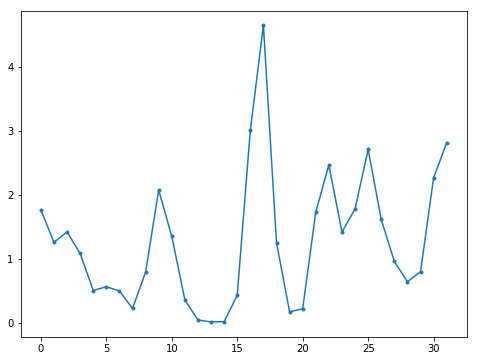

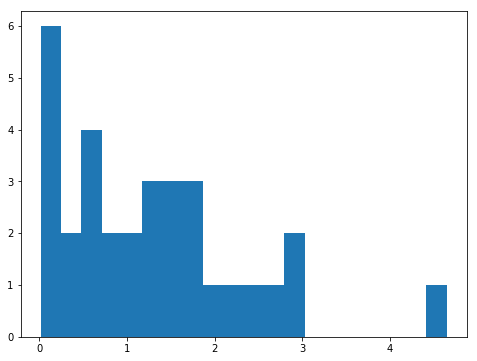

In [152]:
from scipy.stats import norm

p = len(rho)

T = 32

r = rho
assert len(r) == len(rho)

def psi(r):
    p = len(r)
    covariance = np.ones((p, p))
    for i in range(0, p - 1):
        for j in range(0, p - i - 1):
            covariance[i + j + 1, j] = covariance[j, i + j + 1] = rho[i]
    return covariance

covariance = psi(r)
print(covariance)

Z = list(np.random.multivariate_normal(np.zeros(p), covariance))
t = p

alpha = np.dot(r, np.linalg.inv(covariance))
print(alpha)
print(r)
variance = 1 - np.dot(alpha, r)
print(variance)
epsilon = np.random.normal(0, np.sqrt(variance))

def get_next(Z):
    '''Appends next element to Z list'''
    epsilon = np.random.normal(0, np.sqrt(variance))
    Z_t = np.dot(alpha, Z[:-p-1:-1]) + epsilon
    Z.append(Z_t)

while t < T:
    get_next(Z)
    t += 1
    
def inv_exp_cdf(x, l=1):
    return -np.log(1. - x) / l

Y = inv_exp_cdf(norm.cdf(Z), 1)
print(Y.shape)

def acm(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

def acf(x, length=20):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]  \
        for i in range(1, length)])

# print(autocorr(Y, 1))
print(p)
print(rho, r)
print(acf(Z, p + 2))
print(acf(Y, p + 2))


plt.figure(figsize=(8,6))
plt.plot(Y, '.-')
plt.show()

plt.figure(figsize=(8,6))
plt.hist(Y, bins=20)
plt.show()

In [153]:
np.mean(Y)

1.2808012202651078

[1.38027981 0.98488847 1.1101439  0.84907051 0.39630785 0.44329974
 0.39095519 0.1786109  0.61848168 1.62169775 1.05738557 0.2830963
 0.03718265 0.01318737 0.01723133 0.33833597 2.35156242 3.62772754
 0.98011939 0.13735861 0.17407373 1.35323646 1.92696748 1.11004379
 1.39067775 2.11658492 1.26329104 0.75110347 0.50436297 0.62545114
 1.76990524 2.19737907]


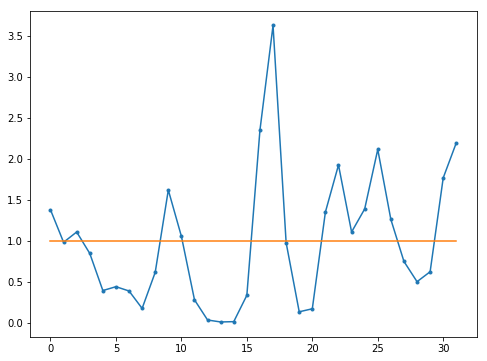

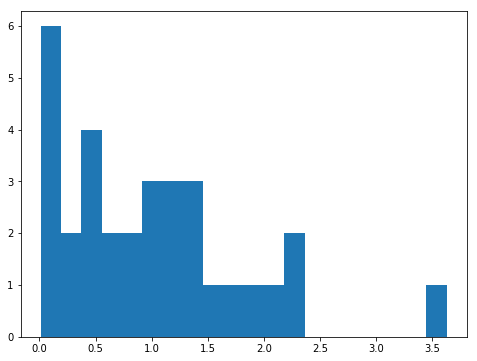

In [160]:
Y = Y / np.mean(Y)
print(Y)

plt.figure(figsize=(8,6))
plt.plot(Y, '.-')
plt.plot(y*0+1)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(Y, bins=20)
plt.show()

[446092.75] [221105.6875] [4107.36816406]


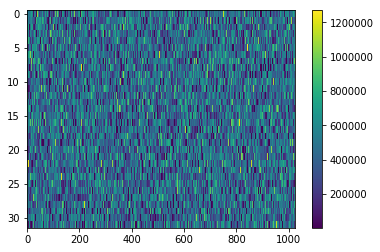

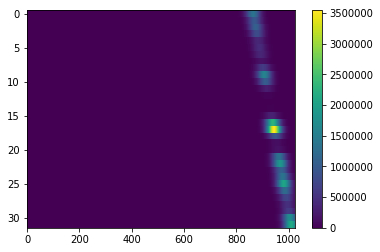

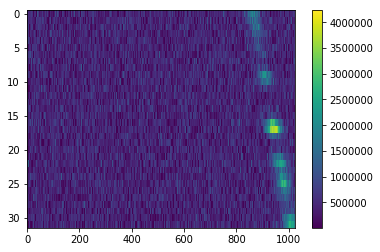

In [158]:
real_noise = np.load('real_noise_dists.npy')


def scint(level):
    def y(t):
        return np.repeat(Y.reshape((32, 1)) * level, 1024, axis=1)
    return y


tsamp = 1.4316557653333333
fch1 = 6000.464843051508
df = -1.3969838619232178e-06

fchans = 1024
tchans = 32
fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

means, stds, mins = stg.make_normal(real_noise[:,0], real_noise[:,1], real_noise[:,2], 1)
print(means, stds, mins)
frame = np.random.normal(means, stds, [tchans, fchans])
frame = np.maximum(np.random.normal(means, stds, [tchans, fchans]), mins)

plt.imshow(frame, aspect='auto')
plt.colorbar()
plt.show()

start_index = np.random.randint(0,fchans)
drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans), (fchans-1-start_index)*df/(tsamp*tchans))
line_width = np.random.uniform(0.02, 0.03) ** 3
level = stds * 25 / np.sqrt(tchans)

# drift_rate=0
signal = stg.generate(ts,
                      fs,
                      stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                      scint(level = level),
                      stg.gaussian_f_profile(width = line_width),
                      stg.constant_bp_profile(level = 1.0))

plt.imshow(signal, aspect='auto')
plt.colorbar()
plt.show()
plt.imshow(signal + frame, aspect='auto')
plt.colorbar()
plt.show()


In [97]:
round(2/3)

1

In [110]:
np.repeat(np.array([[1], [2]]), 5, axis=1)

array([[1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2]])